In [1]:
import pandas as pd

In [2]:
s_2016 = pd.read_excel('dataset/stock_data.xlsx',index_col = 0, sheet_name = '上市2016')

In [3]:
s_2017 = pd.read_excel('dataset/stock_data.xlsx',index_col = 0, sheet_name = '上市2017')

In [4]:
s_2018 = pd.read_excel('dataset/stock_data.xlsx',index_col = 0, sheet_name = '上市2018')

In [5]:
s_2019 = pd.read_excel('dataset2019/stock_data_2019-2020.xlsx',index_col = 0, sheet_name = '上市2019')

In [6]:
s_2020 = pd.read_excel('dataset2019/stock_data_2019-2020.xlsx',index_col = 0, sheet_name = '上市2020')

In [11]:
s_2020.loc['3406 玉晶光']

,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),成交筆數(筆),流通在外股數(千股),本益比-TSE,股價淨值比-TSE
證券代碼,,,,,,,,,,,
3406 玉晶光,2020/12/31,571.0000,582.0000,567.0000,567.0000,3469,1989264,3236,111667,20.69,4.33
3406 玉晶光,2020/12/30,564.0000,569.0000,561.0000,568.0000,1574,890086,1528,111484,20.72,4.34
3406 玉晶光,2020/12/29,573.0000,574.0000,562.0000,562.0000,2139,1211395,2146,111484,20.5,4.29
3406 玉晶光,2020/12/28,570.0000,574.0000,566.0000,571.0000,2031,1156672,1851,111484,20.83,4.36
3406 玉晶光,2020/12/25,568.0000,573.0000,560.0000,569.0000,1774,1004514,1725,111484,20.76,4.35
...,...,...,...,...,...,...,...,...,...,...,...
3406 玉晶光,2020/01/08,558.4788,567.3749,550.5711,565.3980,8424,4769980,6880,111092,31.8,6.43
3406 玉晶光,2020/01/07,577.2595,577.2595,529.8135,554.5249,14001,7872503,10858,111092,31.18,6.3
3406 玉晶光,2020/01/06,568.3633,576.2710,560.4557,564.4095,6323,3633369,4919,111092,31.74,6.42


In [27]:
stock_data = pd.concat([
    s_2020.loc['3406 玉晶光'],
    s_2019.loc['3406 玉晶光'],
    s_2018.loc['3406 玉晶光'],
    s_2017.loc['3406 玉晶光'],
    s_2016.loc['3406 玉晶光']
],axis=0)

In [28]:
stock_data_pd = pd.DataFrame(stock_data)
reversed_stock = stock_data_pd.iloc[::-1]
reversed_stock.to_csv(r'玉晶光_stock_data.csv', index = False)

# 開始分類

In [30]:
stocks = pd.read_csv("玉晶光_stock_data.csv")

In [31]:
# importing the modules
import numpy as np 
import matplotlib.pyplot as plt 

In [32]:
from pandas import Timestamp, Series, date_range
x = stocks['年月日'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d'))
y = stocks.loc[:, '收盤價(元)']

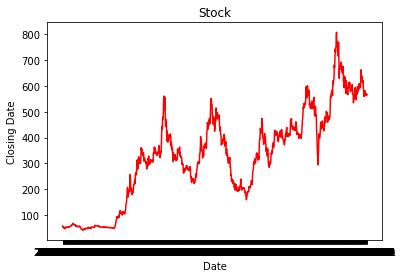

In [33]:
# plotting
plt.title("Stock") 
plt.xlabel("Date") 
plt.ylabel("Closing Date") 
plt.plot(x, y, color ="red") 
# plt.plot(x, y1, color ="green") 
plt.show()

In [53]:
result = []
N = len(stocks)

for index, row in stocks.iterrows():
    date = pd.Timestamp(row['年月日']).strftime('%Y-%m-%d')
    price = row['收盤價(元)']
    
    if index == N-1:
        break;
    
    next_price = stocks.loc[index + 1, '收盤價(元)']
    extent = (next_price - price) / price
    direction = 1
    
    if extent == 0:
        direction = 0
    elif extent < 0 :
        direction = -1
    
    data = {
        "date": date,
        "收盤價(元)": price,
        "幅度": abs(extent),
        "漲/跌": direction
    }
    result.append(data)

In [54]:
result

[{'date': '2016-01-04', '收盤價(元)': 56.77, '幅度': 0.01920028183899953, '漲/跌': -1},
 {'date': '2016-01-05', '收盤價(元)': 55.68, '幅度': 0.06950431034482754, '漲/跌': -1},
 {'date': '2016-01-06', '收盤價(元)': 51.81, '幅度': 0.03454931480409185, '漲/跌': 1},
 {'date': '2016-01-07', '收盤價(元)': 53.6, '幅度': 0.009328358208955223, '漲/跌': -1},
 {'date': '2016-01-08', '收盤價(元)': 53.1, '幅度': 0.05612052730696806, '漲/跌': -1},
 {'date': '2016-01-11',
  '收盤價(元)': 50.12,
  '幅度': 0.029728651237031025,
  '漲/跌': -1},
 {'date': '2016-01-12', '收盤價(元)': 48.63, '幅度': 0.006169031462060398, '漲/跌': 1},
 {'date': '2016-01-13',
  '收盤價(元)': 48.93,
  '幅度': 0.056815859390966714,
  '漲/跌': -1},
 {'date': '2016-01-14', '收盤價(元)': 46.15, '幅度': 0.02145178764897079, '漲/跌': 1},
 {'date': '2016-01-15', '收盤價(元)': 47.14, '幅度': 0.0990666100975817, '漲/跌': 1},
 {'date': '2016-01-18', '收盤價(元)': 51.81, '幅度': 0.019108280254776972, '漲/跌': 1},
 {'date': '2016-01-19', '收盤價(元)': 52.8, '幅度': 0.03749999999999994, '漲/跌': -1},
 {'date': '2016-01-20',
  '收盤價(元

In [55]:
result_pd = pd.DataFrame(result) 

In [57]:
result_pd.to_csv(r'股價漲跌整理.csv', index = False)

In [113]:
print('2016~2020 玉晶光的股價資料筆數:', len(stocks))
print('漲的天數:' , len(result_pd.loc[result_pd['漲/跌'] == 1]))
print('漲幅大於 1 % 的天數:' , len(result_pd.loc[(result_pd['漲/跌'] == 1) & (result_pd['幅度'] > 0.01)]))
print('漲幅大於 2 % 的天數:' , len(result_pd.loc[(result_pd['漲/跌'] == 1) & (result_pd['幅度'] > 0.02)]))
print('漲幅大於 3 % 的天數:' , len(result_pd.loc[(result_pd['漲/跌'] == 1) & (result_pd['幅度'] > 0.03)]))
print('跌的天數:' , len(result_pd.loc[result_pd['漲/跌'] == -1]))
print('跌幅大於 1 % 的天數:' , len(result_pd.loc[(result_pd['漲/跌'] == -1) & (result_pd['幅度'] > 0.01)]))
print('跌幅大於 2 % 的天數:' , len(result_pd.loc[(result_pd['漲/跌'] == -1) & (result_pd['幅度'] > 0.02)]))
print('跌幅大於 3 % 的天數:' , len(result_pd.loc[(result_pd['漲/跌'] == -1) & (result_pd['幅度'] > 0.03)]))
print('沒漲跌的天數:' , len(result_pd.loc[result_pd['漲/跌'] == 0]))

2016~2020 玉晶光的股價資料筆數: 1224
漲的天數: 599
漲幅大於 1 % 的天數: 450
漲幅大於 2 % 的天數: 333
漲幅大於 3 % 的天數: 230
跌的天數: 582
跌幅大於 1 % 的天數: 426
跌幅大於 2 % 的天數: 287
跌幅大於 3 % 的天數: 183
沒漲跌的天數: 42


## 確認新聞篇數

In [64]:
news = pd.read_csv('玉晶光_news.csv')

### 有漲跟跌就分類

In [65]:
up = result_pd.loc[result_pd['漲/跌'] == 1]
down = result_pd.loc[result_pd['漲/跌'] == -1]

In [76]:
## 轉換 news 的 timestamp to date
news['normalized_time'] = news['post_time'].apply(lambda x: str(pd.Timestamp(x).strftime('%Y-%m-%d')))

In [82]:
# news

In [90]:
up_news = []
down_news = []

for index, row in news.iterrows():
    date = row['normalized_time']
    
    if date in list(up['date']):
        up_news.append(list(row))
        continue;
    
    if date in list(down['date']):
        down_news.append(list(row))


In [94]:
print('漲:', len(up_news),'跌:', len(down_news))

漲: 2831 跌: 2710


In [105]:
columns = list(news.columns)

In [112]:
up_news_pd = pd.DataFrame(up_news, columns = columns) 
up_news_pd.to_csv(r'看漲-幅度大於0.csv', index = False)
down_news_pd = pd.DataFrame(down_news, columns = columns) 
down_news_pd.to_csv(r'看跌-幅度大於0.csv', index = False)

In [109]:
len(columns)

10

### 幅度 1%

In [114]:
up_1 = result_pd.loc[(result_pd['漲/跌'] == 1) & (result_pd['幅度'] > 0.01)]
down_1 = result_pd.loc[(result_pd['漲/跌'] == -1) & (result_pd['幅度'] > 0.01)]

In [115]:
up_news_1 = []
down_news_1 = []

for index, row in news.iterrows():
    date = row['normalized_time']
    
    if date in list(up_1['date']):
        up_news_1.append(list(row))
        continue;
    
    if date in list(down_1['date']):
        down_news_1.append(list(row))


In [116]:
print('漲:', len(up_news_1),'跌:', len(down_news_1))

漲: 2297 跌: 2085


In [117]:
up_news_pd = pd.DataFrame(up_news_1, columns = columns) 
up_news_pd.to_csv(r'看漲-幅度大於1%.csv', index = False)
down_news_pd = pd.DataFrame(down_news_1, columns = columns) 
down_news_pd.to_csv(r'看跌-幅度大於1%.csv', index = False)

### 幅度 2%

In [118]:
up_2 = result_pd.loc[(result_pd['漲/跌'] == 1) & (result_pd['幅度'] > 0.02)]
down_2 = result_pd.loc[(result_pd['漲/跌'] == -1) & (result_pd['幅度'] > 0.02)]

In [119]:
up_news_2 = []
down_news_2 = []

for index, row in news.iterrows():
    date = row['normalized_time']
    
    if date in list(up_2['date']):
        up_news_2.append(list(row))
        continue;
    
    if date in list(down_2['date']):
        down_news_2.append(list(row))

In [120]:
print('漲:', len(up_news_2),'跌:', len(down_news_2))

漲: 1692 跌: 1491


In [121]:
up_news_pd = pd.DataFrame(up_news_2, columns = columns) 
up_news_pd.to_csv(r'看漲-幅度大於2%.csv', index = False)
down_news_pd = pd.DataFrame(down_news_2, columns = columns) 
down_news_pd.to_csv(r'看跌-幅度大於2%.csv', index = False)